In [72]:
import requests as req
import pandas as pd
import numpy as np
import json
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sb
import ta

In [20]:
url = "http://rest.coinapi.io/exchangerate/USD?"
headers = {'X-CoinAPI-Key' : 'Your_API_KEY'}
response = req.get(url, headers=headers)

In [33]:
url = "https://rest.coinapi.io/v1/symbols?apikey=Your_API_KEY"

In [35]:
response = req.get(url).json()

In [37]:
with open('symbols.json', 'w') as json_file:
    json.dump(response, json_file)


In [38]:
print(response)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
url = "http://rest.coinapi.io/v1/ohlcv/BINANCE_SPOT_ETH_USDC/history?period_id=1DAY&time_start=2020-12-28T00:00:00&time_end=2022-08-08T00:00:00&limit=600"
headers = {'X-CoinAPI-Key' : 'Your_API_KEY'}

In [3]:
response = req.get(url, headers=headers).json()

In [4]:
len(response)

588

In [5]:
response

[{'time_period_start': '2020-12-28T00:00:00.0000000Z',
  'time_period_end': '2020-12-29T00:00:00.0000000Z',
  'time_open': '2020-12-28T00:00:03.0950000Z',
  'time_close': '2020-12-28T23:59:38.6390000Z',
  'price_open': 684.42,
  'price_high': 746.98,
  'price_low': 680.83,
  'price_close': 729.01,
  'volume_traded': 25763.51754,
  'trades_count': 15333},
 {'time_period_start': '2020-12-29T00:00:00.0000000Z',
  'time_period_end': '2020-12-30T00:00:00.0000000Z',
  'time_open': '2020-12-29T00:00:02.5950000Z',
  'time_close': '2020-12-29T23:59:42.5050000Z',
  'price_open': 729.02,
  'price_high': 739.09,
  'price_low': 687.64,
  'price_close': 730.91,
  'volume_traded': 16248.29869,
  'trades_count': 11362},
 {'time_period_start': '2020-12-30T00:00:00.0000000Z',
  'time_period_end': '2020-12-31T00:00:00.0000000Z',
  'time_open': '2020-12-30T00:00:01.4280000Z',
  'time_close': '2020-12-30T23:59:11.5500000Z',
  'price_open': 731.79,
  'price_high': 758.6,
  'price_low': 709.92,
  'price_clos

In [6]:
with open('ETH_USD.json', 'w') as json_file:
    json.dump(response, json_file)

In [7]:
df = pd.read_json('ETH_USD.json')

In [8]:
df

time_period_start               time_period_end  \
0    2020-12-28T00:00:00.0000000Z  2020-12-29T00:00:00.0000000Z   
1    2020-12-29T00:00:00.0000000Z  2020-12-30T00:00:00.0000000Z   
2    2020-12-30T00:00:00.0000000Z  2020-12-31T00:00:00.0000000Z   
3    2020-12-31T00:00:00.0000000Z  2021-01-01T00:00:00.0000000Z   
4    2021-01-01T00:00:00.0000000Z  2021-01-02T00:00:00.0000000Z   
..                            ...                           ...   
583  2022-08-03T00:00:00.0000000Z  2022-08-04T00:00:00.0000000Z   
584  2022-08-04T00:00:00.0000000Z  2022-08-05T00:00:00.0000000Z   
585  2022-08-05T00:00:00.0000000Z  2022-08-06T00:00:00.0000000Z   
586  2022-08-06T00:00:00.0000000Z  2022-08-07T00:00:00.0000000Z   
587  2022-08-07T00:00:00.0000000Z  2022-08-08T00:00:00.0000000Z   

                        time_open                    time_close  price_open  \
0    2020-12-28T00:00:03.0950000Z  2020-12-28T23:59:38.6390000Z      684.42   
1    2020-12-29T00:00:02.5950000Z  2020-12-29T23:59:42.5050000Z      729.02   
2    2020-12-30T00:00:01.4280000Z  2020-12-30T23:59:11.5500000Z      731.79   
3    2020-12-31T00:00:01.7820000Z  2020-12-31T23:58:51.7880000Z      752.50   
4    2021-01-01T00:00:26.1160000Z  2021-01-01T23:56:57.2780000Z      736.90   
..                            ...                           ...         ...   
583  2022-08-03T00:00:05.8050000Z  2022-08-03T23:59:59.7240000Z     1631.15   
584  2022-08-04T00:00:01.4310000Z  2022-08-04T23:59:58.9150000Z     1618.50   
585  2022-08-05T00:00:06.6330000Z  2022-08-05T23:59:59.5180000Z     1608.05   
586  2022-08-06T00:00:00.5590000Z  2022-08-06T23:59:55.0270000Z     1737.14   
587  2022-08-07T00:00:03.4570000Z  2022-08-07T23:59:58.7660000Z     1691.01   

     price_high  price_low  price_close  volume_traded  trades_count  
0        746.98     680.83       729.01    25763.51754         15333  
1        739.09     687.64       730.91    16248.29869         11362  
2        758.60     709.92       751.98    14385.47579          9679  
3        756.04     722.00       737.27    18938.33743          9639  
4        750.39     714.86       730.79    15129.68596          7544  
..          ...        ...          ...            ...           ...  
583     1684.60    1590.58      1618.62    62869.24340        101102  
584     1663.00    1580.63      1608.23    52963.42630         85404  
585     1741.87    1605.71      1736.57    58457.61080         91572  
586     1751.47    1685.00      1690.33    32432.65890         46956  
587     1730.00    1670.00      1700.39    31401.66210         43537  

[588 rows x 10 columns]

In [57]:
r = req.request("GET", "http://api-dev.augmento.ai/v0.1/coins")
print(r.content)

b'["0x","aelf","aion","ardor","ark","augur","bitcoin","cardano","dash","decentraland","decred","digibyte","dogecoin","dragonchain","electroneum","eos","ethereum","iota","komodo","lisk","litecoin","monero","nano","nem","neo","ontology","polymath","qtum","ravencoin","reddcoin","ripple","siacoin","steem","stellar","stratis","syscoin","tether","tron","vechain","verge","waltonchain","wanchain","zcash","zilliqa","binance_coin","bitcoin_cash","bitcoin_gold","bitcoin_sv","kucoin_shares","pundi_x"]\n'


In [58]:
r = req.request("GET", "http://api-dev.augmento.ai/v0.1/topics")
print(r.content)

b'{"0":"Hacks","1":"Pessimistic/Doubtful","2":"Banks","3":"Selling","4":"Market_manipulation","5":"(De-)centralisation","6":"Angry","7":"ETF","8":"Leverage","9":"Bottom","10":"Institutional_money","11":"FOMO","12":"Prediction","13":"Adoption","14":"Fearful/Concerned","15":"Portfolio","16":"FUD_theme","17":"Whitepaper","18":"Announcements","19":"Technical_analysis","20":"Flippening","21":"Community","22":"Investing/Trading","23":"Euphoric/Excited","24":"Hodling","25":"ICO","26":"Bearish","27":"Going_short","28":"Uncertain","29":"Volume","30":"Risk","31":"Governance","32":"Ban","33":"Cheap","34":"Short_term_trading","35":"Fork","36":"Progress","37":"Shilling","38":"Bullish","39":"Happy","40":"Bubble","41":"Bots","42":"Hopeful","43":"Bug","44":"Open_source","45":"Token_economics","46":"Security","47":"Marketing","48":"Bad_news","49":"Due_diligence","50":"Team","51":"Partnerships","52":"Pump_and_dump","53":"Sad","54":"Panicking","55":"Listing","56":"Regulation/Politics","57":"Dip","58":"La

In [59]:
r.json()

{'0': 'Hacks',
 '1': 'Pessimistic/Doubtful',
 '2': 'Banks',
 '3': 'Selling',
 '4': 'Market_manipulation',
 '5': '(De-)centralisation',
 '6': 'Angry',
 '7': 'ETF',
 '8': 'Leverage',
 '9': 'Bottom',
 '10': 'Institutional_money',
 '11': 'FOMO',
 '12': 'Prediction',
 '13': 'Adoption',
 '14': 'Fearful/Concerned',
 '15': 'Portfolio',
 '16': 'FUD_theme',
 '17': 'Whitepaper',
 '18': 'Announcements',
 '19': 'Technical_analysis',
 '20': 'Flippening',
 '21': 'Community',
 '22': 'Investing/Trading',
 '23': 'Euphoric/Excited',
 '24': 'Hodling',
 '25': 'ICO',
 '26': 'Bearish',
 '27': 'Going_short',
 '28': 'Uncertain',
 '29': 'Volume',
 '30': 'Risk',
 '31': 'Governance',
 '32': 'Ban',
 '33': 'Cheap',
 '34': 'Short_term_trading',
 '35': 'Fork',
 '36': 'Progress',
 '37': 'Shilling',
 '38': 'Bullish',
 '39': 'Happy',
 '40': 'Bubble',
 '41': 'Bots',
 '42': 'Hopeful',
 '43': 'Bug',
 '44': 'Open_source',
 '45': 'Token_economics',
 '46': 'Security',
 '47': 'Marketing',
 '48': 'Bad_news',
 '49': 'Due_diligen

In [11]:
SentimentUrl = "http://api-dev.augmento.ai/v0.1/events/aggregated"
SentimentParams = {
  "source" : "twitter",
  "coin" : "ethereum",
  "bin_size" : "24H",
  "count_ptr" : 600,
  "start_ptr" : 0,
  "start_datetime" : "2020-12-27T00:00:00Z",
  "end_datetime" : "2022-08-08T00:00:00Z",
}
SentimentResponse = req.get(SentimentUrl, params=SentimentParams).json()

In [12]:
len(SentimentResponse)

589

In [10]:
SentimentResponse

[{'counts': [0,
   3,
   1,
   12,
   2,
   6,
   1,
   0,
   2,
   3,
   0,
   5,
   47,
   25,
   1,
   9,
   0,
   0,
   1,
   16,
   0,
   7,
   71,
   16,
   5,
   2,
   8,
   6,
   20,
   20,
   7,
   0,
   1,
   1,
   3,
   3,
   7,
   2,
   24,
   12,
   2,
   4,
   3,
   0,
   0,
   3,
   6,
   1,
   8,
   19,
   13,
   0,
   0,
   0,
   0,
   5,
   10,
   1,
   1,
   0,
   44,
   0,
   8,
   35,
   3,
   24,
   3,
   8,
   2,
   10,
   1,
   1,
   68,
   0,
   7,
   83,
   1,
   28,
   3,
   40,
   3,
   0,
   2,
   17,
   0,
   1,
   137,
   20,
   0,
   4,
   1,
   28,
   74],
  'datetime': '2021-01-01T00:00:00Z',
  't_epoch': 1609459200},
 {'counts': [1,
   0,
   1,
   19,
   2,
   9,
   5,
   1,
   3,
   6,
   10,
   6,
   98,
   22,
   5,
   6,
   0,
   0,
   1,
   42,
   0,
   13,
   151,
   24,
   0,
   3,
   9,
   4,
   33,
   24,
   9,
   0,
   0,
   5,
   7,
   1,
   6,
   2,
   75,
   6,
   0,
   4,
   10,
   3,
   1,
   4,
   6,
   0,
   12,
   24,
   7,
   1,
   

In [13]:
len(SentimentResponse[0]['counts'])

93

In [14]:
remainingList=[]
remainingDates=[]
remainingIndices = [1,3, 6, 14, 23, 24, 26, 27, 30, 33, 36, 38, 39, 40, 42, 48, 53, 54, 63, 71, 75, 77, 83, 85, 91, 92]
for item in SentimentResponse:
    itemTopics = item['counts']
    itemDate = item['datetime']
    remainingTopics = [itemTopics[i] for i in remainingIndices]
    remainingList.append(remainingTopics)
    remainingDates.append(itemDate)

In [15]:
dfSentiments = pd.DataFrame(remainingList, columns = ['Pessimistic/Doubtful','Selling','Angry','Fearful/Concerned','Euphoric/Excited','Hodling','Bearish','Going_short','Risk','Cheap','Progress','Bullish','Happy','Bubble','Hopeful','Bad_news','Sad','Panicking','Good_news','Recovery','Positive','Long_term_investing','Buying','Annoyed/Frustrated','Optimistic','Negative'])

In [16]:
dfSentiments

Pessimistic/Doubtful  Selling  Angry  Fearful/Concerned  \
0                      12       20      5                  3   
1                       5       35      4                  2   
2                       9       26      7                  8   
3                       3       16      3                  0   
4                       2       11      4                  1   
..                    ...      ...    ...                ...   
584                     3       10      1                  5   
585                     0       10      0                  1   
586                     0       12      2                  3   
587                     5        8      3                  4   
588                     4        8      0                  3   

     Euphoric/Excited  Hodling  Bearish  Going_short  Risk  Cheap  ...  Sad  \
0                  37        4        9            3     6      7  ...    1   
1                  27        3       15            9    11      5  ...    0   
2                  13        1        5            7     7      4  ...    2   
3                  19        2        5            4     4      4  ...    0   
4                  20        0        7            6     4      8  ...    0   
..                ...      ...      ...          ...   ...    ...  ...  ...   
584                14        1       26            2     3      0  ...    1   
585                11        1       45            1     1      0  ...    0   
586                18        2       22            8    11      1  ...    0   
587                 8        1        9            3     5      4  ...    0   
588                 9        2       19            4     4      0  ...    1   

     Panicking  Good_news  Recovery  Positive  Long_term_investing  Buying  \
0            1         79         2       164                   59      50   
1            0         88         2       166                   79      45   
2            0         58         2       144                   53      36   
3            0         56         1       101                   36      27   
4            0         49         0       112                   39      24   
..         ...        ...       ...       ...                  ...     ...   
584          0         64         2       133                   28      20   
585          0         70         0       115                   21      19   
586          0         76         0       129                   26      23   
587          0         50         0       103                   18      15   
588          0         39         0       102                   14      17   

     Annoyed/Frustrated  Optimistic  Negative  
0                     1          32       152  
1                     0          44       122  
2                     0          35       133  
3                     0          26        53  
4                     1          35        89  
..                  ...         ...       ...  
584                   0          17       103  
585                   0          16        84  
586                   1          20        85  
587                   0          22        82  
588                   0          14        79  

[589 rows x 26 columns]

In [17]:
dfSentiments.insert(loc=0, column= "time_period", value=remainingDates)

In [18]:
dfSentiments.head()

time_period  Pessimistic/Doubtful  Selling  Angry  \
0  2020-12-27T00:00:00Z                    12       20      5   
1  2020-12-28T00:00:00Z                     5       35      4   
2  2020-12-29T00:00:00Z                     9       26      7   
3  2020-12-30T00:00:00Z                     3       16      3   
4  2020-12-31T00:00:00Z                     2       11      4   

   Fearful/Concerned  Euphoric/Excited  Hodling  Bearish  Going_short  Risk  \
0                  3                37        4        9            3     6   
1                  2                27        3       15            9    11   
2                  8                13        1        5            7     7   
3                  0                19        2        5            4     4   
4                  1                20        0        7            6     4   

   ...  Sad  Panicking  Good_news  Recovery  Positive  Long_term_investing  \
0  ...    1          1         79         2       164                   59   
1  ...    0          0         88         2       166                   79   
2  ...    2          0         58         2       144                   53   
3  ...    0          0         56         1       101                   36   
4  ...    0          0         49         0       112                   39   

   Buying  Annoyed/Frustrated  Optimistic  Negative  
0      50                   1          32       152  
1      45                   0          44       122  
2      36                   0          35       133  
3      27                   0          26        53  
4      24                   1          35        89  

[5 rows x 27 columns]

In [19]:
dfSentiments.to_csv('ETH_Sentiment.csv')

In [90]:
dfETH = pd.read_json('ETH_USD.json')
dfSentiment = pd.read_csv('ETH_Sentiment.csv') 

In [91]:
dfETH["time_period_start"] = pd.to_datetime(dfETH["time_period_start"])
dfETH["time_period_start"] = dfETH.time_period_start.dt.strftime('%m/%d/%Y')

In [92]:
dfETH.drop(columns=["time_period_end", "time_open", "time_close"], inplace=True)
dfETH.rename(columns={"time_period_start" : "time_period"}, inplace=True)

In [93]:
dfSentiment["time_period"] = pd.to_datetime(dfSentiment["time_period"])
dfSentiment["time_period"] = dfSentiment.time_period.dt.strftime('%m/%d/%Y')
dfSentiment.drop(columns=["Unnamed: 0"], inplace=True)

In [118]:
dfData = pd.merge(dfETH, dfSentiment, on="time_period", how="inner")

In [95]:
dfData.set_index('time_period', inplace = True)
print(len(dfData))
dfData.head()

588


price_open  price_high  price_low  price_close  volume_traded  \
time_period                                                                  
12/28/2020       684.42      746.98     680.83       729.01    25763.51754   
12/29/2020       729.02      739.09     687.64       730.91    16248.29869   
12/30/2020       731.79      758.60     709.92       751.98    14385.47579   
12/31/2020       752.50      756.04     722.00       737.27    18938.33743   
01/01/2021       736.90      750.39     714.86       730.79    15129.68596   

             trades_count  Pessimistic/Doubtful  Selling  Angry  \
time_period                                                       
12/28/2020          15333                     5       35      4   
12/29/2020          11362                     9       26      7   
12/30/2020           9679                     3       16      3   
12/31/2020           9639                     2       11      4   
01/01/2021           7544                     3       12      1   

             Fearful/Concerned  ...  Sad  Panicking  Good_news  Recovery  \
time_period                     ...                                        
12/28/2020                   2  ...    0          0         88         2   
12/29/2020                   8  ...    2          0         58         2   
12/30/2020                   0  ...    0          0         56         1   
12/31/2020                   1  ...    0          0         49         0   
01/01/2021                   1  ...    0          0         35         1   

             Positive  Long_term_investing  Buying  Annoyed/Frustrated  \
time_period                                                              
12/28/2020        166                   79      45                   0   
12/29/2020        144                   53      36                   0   
12/30/2020        101                   36      27                   0   
12/31/2020        112                   39      24                   1   
01/01/2021         83                   28      17                   1   

             Optimistic  Negative  
time_period                        
12/28/2020           44       122  
12/29/2020           35       133  
12/30/2020           26        53  
12/31/2020           35        89  
01/01/2021           28        74  

[5 rows x 32 columns]

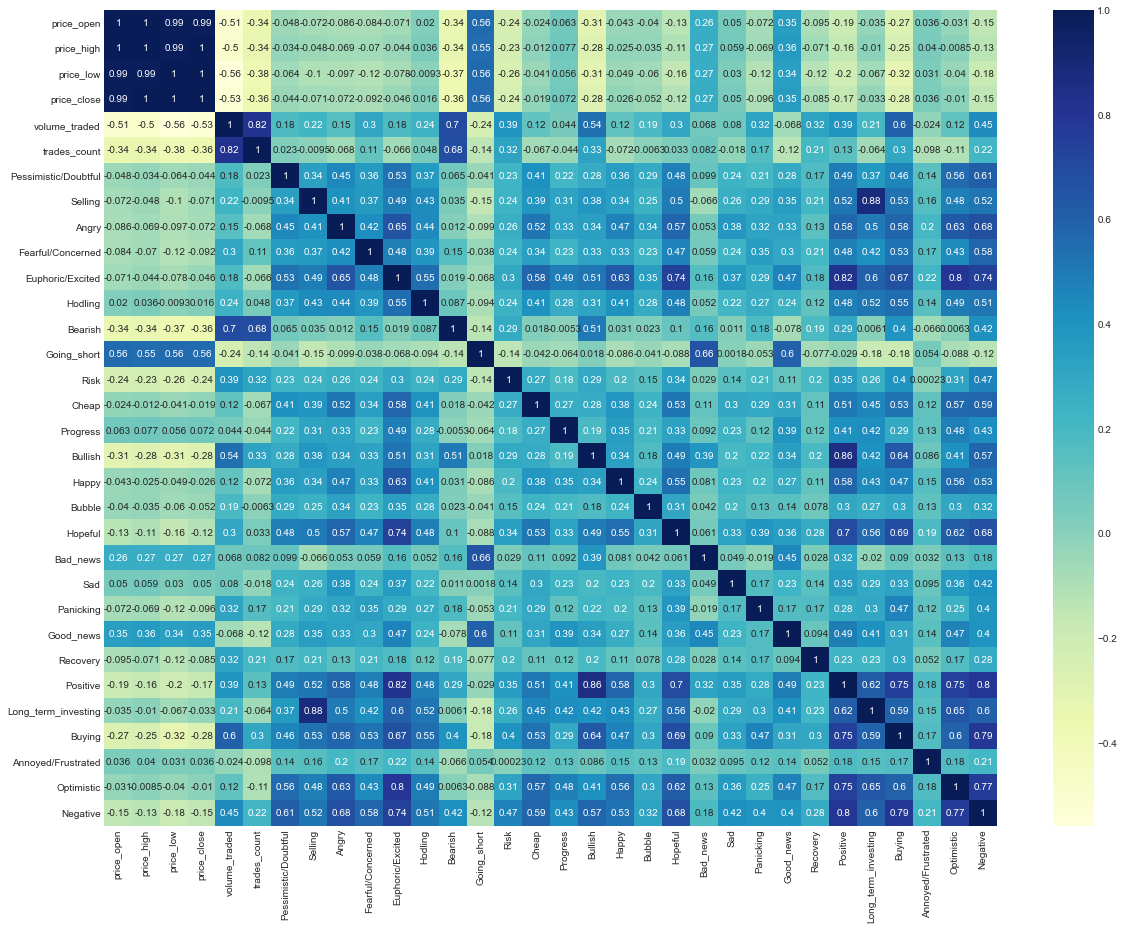

In [121]:
plt.subplots(figsize=(20,15))
dataplot = sb.heatmap(dfData.corr(), cmap="YlGnBu", annot=True)
plt.savefig('correlationMatix.jpg')
plt.show()

In [122]:
corelation = dfData.corr()
corelation = corelation[corelation.abs()>0.7]
corelation[corelation == 1] = np.nan

In [123]:
corelation.dropna(axis = 0, how='all', inplace = True)
corelation.dropna(axis = 1, how='all', inplace = True)

In [100]:
rows = list(corelation.index)
cols = list(corelation.columns)

In [101]:
columns = list(set(rows+cols))

In [102]:
dfData = dfData[columns]

In [103]:
dfData.head()

volume_traded  Bullish  Positive  Negative  Hopeful  \
time_period                                                        
12/28/2020     25763.51754       89       166       122       12   
12/29/2020     16248.29869       56       144       133       10   
12/30/2020     14385.47579       66       101        53        7   
12/31/2020     18938.33743       48       112        89       12   
01/01/2021     15129.68596       24        83        74        3   

             Euphoric/Excited  Long_term_investing  price_open  trades_count  \
time_period                                                                    
12/28/2020                 27                   79      684.42         15333   
12/29/2020                 13                   53      729.02         11362   
12/30/2020                 19                   36      731.79          9679   
12/31/2020                 20                   39      752.50          9639   
01/01/2021                 16                   28      736.90          7544   

             Selling  price_low  Buying  price_close  Optimistic  price_high  
time_period                                                                   
12/28/2020        35     680.83      45       729.01          44      746.98  
12/29/2020        26     687.64      36       730.91          35      739.09  
12/30/2020        16     709.92      27       751.98          26      758.60  
12/31/2020        11     722.00      24       737.27          35      756.04  
01/01/2021        12     714.86      17       730.79          28      750.39

In [105]:
rsi = ta.momentum.RSIIndicator(dfData["price_close"], window = 7, fillna = False)
dfData["rsi"] = rsi.rsi()

In [106]:
bolinger = ta.volatility.BollingerBands(dfData["price_close"], window = 7, window_dev = 1, fillna = False)
dfData["bolinger_high"] = bolinger.bollinger_hband() 
dfData["bolinger_low"] = bolinger.bollinger_lband()
dfData["bolinger_middle"] = bolinger.bollinger_mavg()

In [108]:
macd = ta.trend.MACD(dfData["price_close"], window_slow = 14, window_fast = 4, window_sign = 7, fillna = False)
dfData["macd"] = macd.macd() 

In [109]:
dfData["vortex"] = ta.trend.vortex_indicator_neg(high=dfData["price_high"], low=dfData["price_low"], close=dfData["price_close"], window=7, fillna=False)

In [110]:
stoch = ta.momentum.StochasticOscillator(high=dfData["price_high"], low=dfData["price_low"], close=dfData["price_close"], window=7, smooth_window = 3, fillna = False)
dfData["stoch"] = stoch.stoch()

In [112]:
dfData["movement"] = ta.volume.ease_of_movement(high=dfData["price_high"], low=dfData["price_low"], volume = dfData["trades_count"], window=7, fillna=False)

In [113]:
dfData

volume_traded  Bullish  Positive  Negative  Hopeful  \
time_period                                                        
12/28/2020     25763.51754       89       166       122       12   
12/29/2020     16248.29869       56       144       133       10   
12/30/2020     14385.47579       66       101        53        7   
12/31/2020     18938.33743       48       112        89       12   
01/01/2021     15129.68596       24        83        74        3   
...                    ...      ...       ...       ...      ...   
08/03/2022     62869.24340       92       133       103        2   
08/04/2022     52963.42630       94       115        84        5   
08/05/2022     58457.61080      110       129        85        7   
08/06/2022     32432.65890       77       103        82        4   
08/07/2022     31401.66210       68       102        79        7   

             Euphoric/Excited  Long_term_investing  price_open  trades_count  \
time_period                                                                    
12/28/2020                 27                   79      684.42         15333   
12/29/2020                 13                   53      729.02         11362   
12/30/2020                 19                   36      731.79          9679   
12/31/2020                 20                   39      752.50          9639   
01/01/2021                 16                   28      736.90          7544   
...                       ...                  ...         ...           ...   
08/03/2022                 14                   28     1631.15        101102   
08/04/2022                 11                   21     1618.50         85404   
08/05/2022                 18                   26     1608.05         91572   
08/06/2022                  8                   18     1737.14         46956   
08/07/2022                  9                   14     1691.01         43537   

             Selling  ...  Optimistic  price_high        rsi  bolinger_high  \
time_period           ...                                                     
12/28/2020        35  ...          44      746.98        NaN            NaN   
12/29/2020        26  ...          35      739.09        NaN            NaN   
12/30/2020        16  ...          26      758.60        NaN            NaN   
12/31/2020        11  ...          35      756.04        NaN            NaN   
01/01/2021        12  ...          28      750.39        NaN            NaN   
...              ...  ...         ...         ...        ...            ...   
08/03/2022        10  ...          17     1684.60  54.637436    1713.884245   
08/04/2022        10  ...          16     1663.00  52.484176    1696.047810   
08/05/2022        12  ...          20     1741.87  69.695302    1701.510031   
08/06/2022         8  ...          22     1751.47  60.485968    1699.672857   
08/07/2022         8  ...          14     1730.00  61.768228    1704.927636   

             bolinger_low  bolinger_middle       macd    vortex      stoch  \
time_period                                                                  
12/28/2020            NaN              NaN        NaN       NaN        NaN   
12/29/2020            NaN              NaN        NaN       NaN        NaN   
12/30/2020            NaN              NaN        NaN       NaN        NaN   
12/31/2020            NaN              NaN        NaN       NaN        NaN   
01/01/2021            NaN              NaN        NaN       NaN        NaN   
...                   ...              ...        ...       ...        ...   
08/03/2022    1630.138612      1672.011429  48.636067  0.948638  26.471623   
08/04/2022    1614.637904      1655.342857  34.787612  1.184784  23.984582   
08/05/2022    1613.184255      1657.347143  59.955076  1.034928  91.002912   
08/06/2022    1613.030001      1656.351429  57.513886  0.990569  67.378532   
08/07/2022    1613.900935      1659.414286  55.859727  1.036698  73.536421   

                 movement  
time_period     

In [114]:
dfData.to_csv("dfData.csv")

In [116]:
dfData.to_excel("dfData.xlsx")